# Visualize a BioBombe Application

## Neutrophil and Monocyte Signatures Derived from GTEx Data with xCell gene sets

**Gregory Way, 2018**

Generating a main and supplemental figure describing the specific BioBombe application.

In [1]:
suppressPackageStartupMessages(library(dplyr))

suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggrepel))
suppressPackageStartupMessages(library(cowplot))

# Load custom plotting functions
util_file = file.path("..", "6.analyze-weights", "scripts", "utils.R")
source(util_file)

### Panel A - Determining which genesets are enriched in each VAE feature for z = 2 and z = 3

In [2]:
# Load and process data
results_file <- file.path('results', 'gtex_vae_example_interpret_compression.tsv')
interpret_data_df <- (
    readr::read_tsv(results_file,
                    col_types = readr::cols(.default = readr::col_character(),
                                            raw_score = readr::col_double(),
                                            z_score = readr::col_double()))
    )

interpret_data_df$full_feature <- factor(interpret_data_df$full_feature,
                                  levels = c("vae_0_two", "vae_1_two", "vae_0_three",
                                             "vae_1_three", "vae_2_three"))


In [3]:
# Setup plotting logic
vae_labels <- c("vae_0_two" = "z = 2 (0)",
                "vae_1_two" = "z = 2 (1)",
                "vae_0_three" = "z = 3 (0)",
                "vae_1_three" = "z = 3 (1)",
                "vae_2_three" = "z = 3 (2)")

vae_colors <- c("#c994c7", "#dd1c77", "#78c679", "#31a354", "#006837")

color_logic <- (interpret_data_df$z_score > 13 | interpret_data_df$z_score < -18)

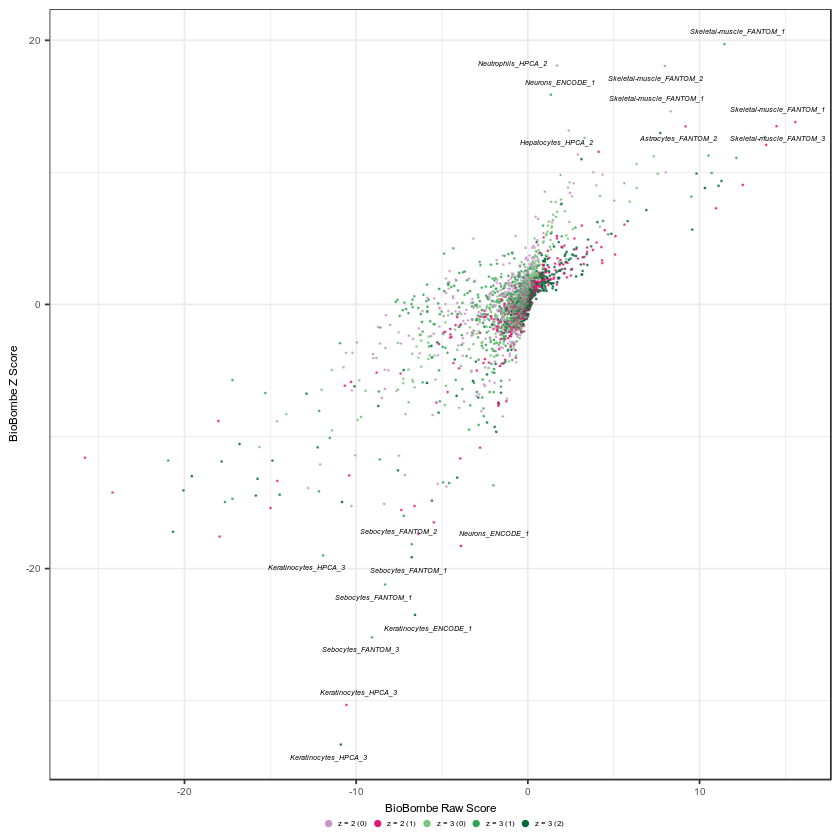

In [4]:
# Plot
panel_a_gg <- ggplot(interpret_data_df,
                     aes(x = raw_score,
                         y = z_score)) +
    geom_point(aes(color = full_feature),
               size = 0.14,
               alpha = 0.65) +
    scale_color_manual(name = "",
                       values = vae_colors,
                       labels =  vae_labels) +
    geom_text_repel(data = subset(interpret_data_df, color_logic),
                    arrow = arrow(length = unit(0.01, "npc")),
                    segment.size = 0.3,
                    segment.alpha = 0.6,
                    size = 1.5,
                    fontface = "italic",
                    box.padding = 0.25,
                    point.padding = 0.15,
                    aes(x = raw_score,
                        y = z_score,
                        label = variable)) +
    xlab("BioBombe Raw Score") +
    ylab("BioBombe Z Score") +
    theme_bw() +
    theme(axis.title = element_text(size = 7),
          axis.text.x = element_text(size = 6),
          axis.text.y = element_text(size = 6),
          legend.position = 'bottom',
          legend.text = element_text(size = 4.7),
          legend.margin = margin(0, 0, 0, 0),
          legend.box.margin = margin(-8, 0, 0, 0)) +
    guides(color = guide_legend(nrow = 1,
                                ncol = 5,
                                byrow = FALSE,
                                keywidth = 0.1,
                                keyheight = 0.1,
                                default.unit = "inch",
                                override.aes = list(size = 1.4,
                                                    alpha = 1)))

panel_a_gg

### Panel B - Determining which genesets are enriched on average in both VAE models (z = 2 vs. z = 3)

In [5]:
# Load and process data
file <- file.path('results', 'gtex_vae_example_differentiating_features.tsv')
feature_info_df <- readr::read_tsv(file,
                                   col_types = readr::cols(.default = readr::col_double(),
                                                           variable = readr::col_character()))

In [6]:
# Setup plotting logic
color_logic = feature_info_df$abs_diff > 3.5 | feature_info_df$two > 13  | feature_info_df$three > 13

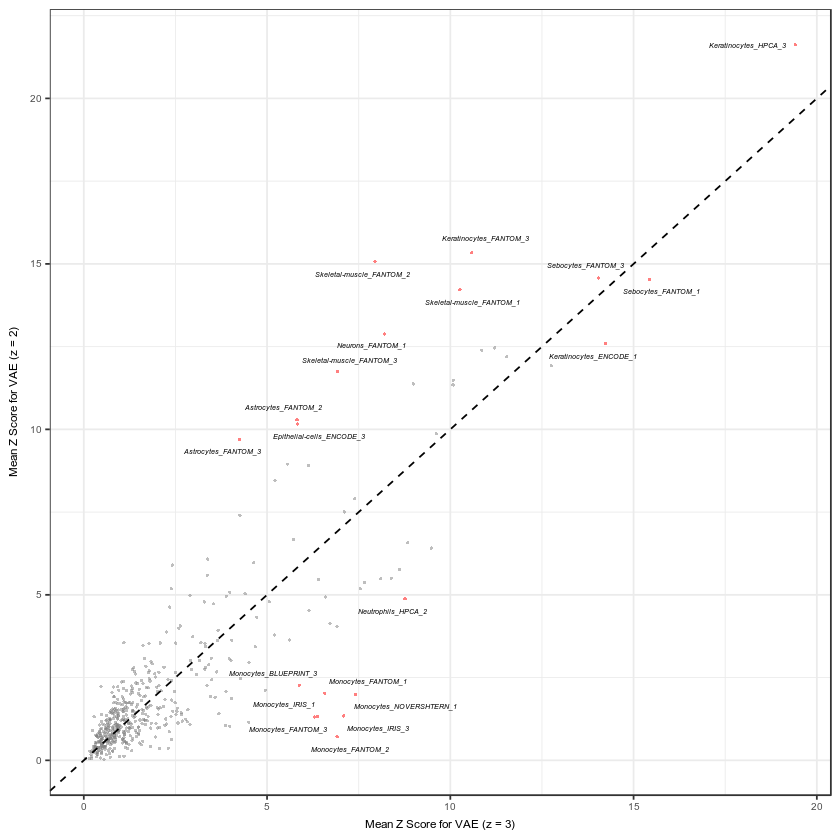

In [7]:
panel_b_gg <- ggplot(feature_info_df, aes(x = three, y = two)) +
    geom_point(alpha = 0.5,
               size = 0.6,
               shape = 16,
               color = ifelse(color_logic, "red", "grey50")) +
    geom_abline(intercept = 0, slope = 1, linetype = 'dashed') +
    geom_text_repel(data = subset(feature_info_df, color_logic),
                    arrow = arrow(length = unit(0.01, "npc")),
                    segment.size = 0.3,
                    segment.alpha = 0.6,
                    size = 1.5,
                    fontface = "italic",
                    box.padding = 0.25,
                    point.padding = 0.15,
                    aes(x = three,
                        y = two,
                        label = variable)) +
    xlab("Mean Z Score for VAE (z = 3)") +
    ylab("Mean Z Score for VAE (z = 2)") +
    theme_bw() +
    theme(axis.title = element_text(size = 7),
          axis.text.x = element_text(size = 6),
          axis.text.y = element_text(size = 6))
    
panel_b_gg

## Panel C - Tracking Neutrophil Signatures Across Algorithms and Dimensions

We are specically interested in tracking `Neutrophils_HPCA_2`.

In [8]:
gene_set_dir <- file.path("..", "6.analyze-weights", "results", "gtex", "gpxcell", "signal")
metaedge <- "GpXCELL"
dataset <- "GTEX"

In [9]:
line_plot_theme <-
    theme(strip.background = element_rect(colour = "black", fill = "#fdfff4"),
          strip.text = element_text(size = 6),
          axis.title = element_text(size = 7),
          axis.title.x = element_text(margin = margin(t = 0.1, r = 0, b = 0, l = 0, unit = 'cm')),
          axis.text.x = element_text(size = 5),
          axis.text.y = element_text(size = 6),
          legend.text = element_text(size = 4.7),
          legend.title = element_text(size = 6),
          legend.margin = margin(t = 0, r = 0, b = 0, l = 0),
          legend.box.margin = margin(t = -3, r = 0, b = -3, l = -3))

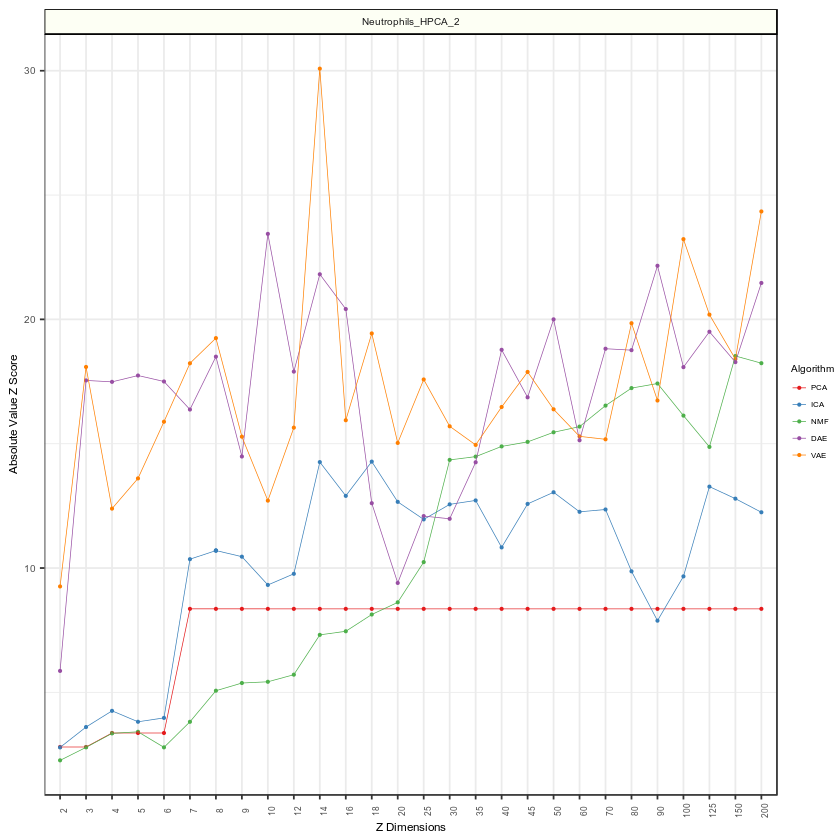

In [10]:
panel_c_gg <- plot_gene_set(gene_set = "Neutrophils_HPCA_2",
                            gene_set_dir = gene_set_dir,
                            metaedge = metaedge,
                            dataset = dataset,
                            show_plot = FALSE,
                            shuffled = FALSE,
                            return_top = FALSE,
                            return_plot = TRUE)

panel_c_gg <- panel_c_gg + line_plot_theme

panel_c_gg

## Panel D - Tracking Monocyte Signatures Across Algorithms and Dimensions

We are specically interested in tracking `Monocytes_FANTOM_2`.

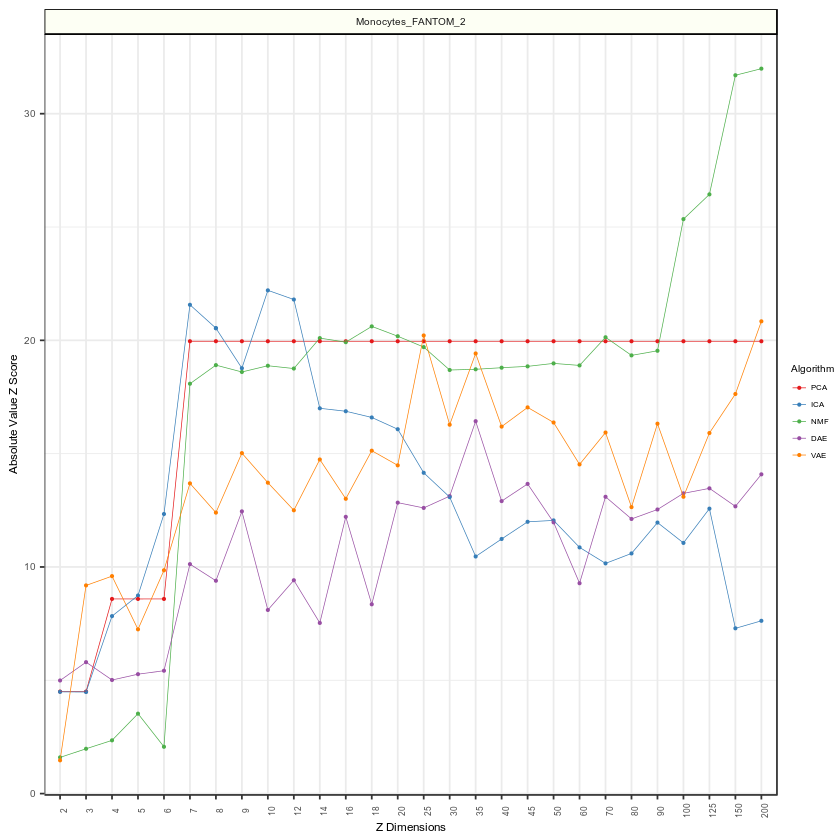

In [11]:
panel_d_gg <- plot_gene_set(gene_set = "Monocytes_FANTOM_2",
                            gene_set_dir = gene_set_dir,
                            metaedge = metaedge,
                            dataset = dataset,
                            show_plot = FALSE,
                            shuffled = FALSE,
                            return_top = FALSE,
                            return_plot = TRUE)

panel_d_gg <- panel_d_gg + line_plot_theme

panel_d_gg

## Panel E - Comparing High Scoring Neutrophil Features (xCell Genesets)

VAE feature 0 in z = 3 vs. VAE feature 10 in z = 14.

In [12]:
# Load and process data
file <- file.path('results', 'latent_feature_enrichment_comparison_neutrophil_genesets.tsv')
geneset_weights_df <- (
    readr::read_tsv(file,
                    col_types = readr::cols(.default = readr::col_double(),
                                            model_type_z3 = readr::col_character(),
                                            variable = readr::col_character(),
                                            algorithm_z3 = readr::col_character(),
                                            model_type_z14 = readr::col_character(),
                                            algorithm_z14 = readr::col_character()))
    ) %>%
    dplyr::filter(feature_z3 == 0,
                  feature_z14 == 10)

head(geneset_weights_df, 3)

model_type_z3,variable,value_z3,z_score_z3,algorithm_z3,feature_z3,z_z3,seed_z3,model_type_z14,value_z14,z_score_z14,algorithm_z14,feature_z14,z_z14,seed_z14
real,Keratinocytes_HPCA_3,1.395400,5.91483,vae,0,3,908341,real,-2.46113,-5.42071,vae,10,14,486191
real,Sebocytes_FANTOM_3,1.278630,4.36728,vae,0,3,908341,real,-1.80624,-3.52964,vae,10,14,486191
real,Keratinocytes_ENCODE_1,0.994284,3.20316,vae,0,3,908341,real,-1.31071,-2.91931,vae,10,14,486191


In [13]:
# Process plotting logic
color_logic <- ((geneset_weights_df$z_score_z3 < -9 | geneset_weights_df$z_score_z3 > 10) |
                (geneset_weights_df$z_score_z14 < -10 | geneset_weights_df$z_score_z14 > 10))

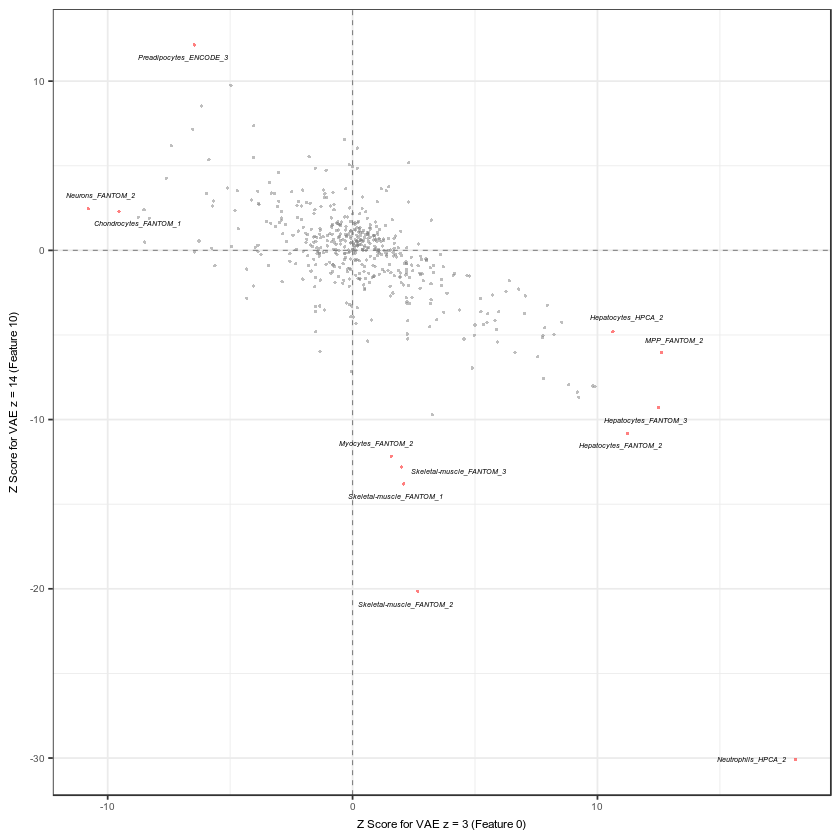

In [14]:
# Generate plot
panel_e_gg <- ggplot(geneset_weights_df,
                     aes(x = z_score_z3, y = z_score_z14)) +
    geom_point(alpha = 0.5,
               size = 0.6,
               shape = 16,
               color = ifelse(color_logic, "red", "grey50")) +
    geom_hline(yintercept = 0,
               linetype = 'dashed',
               color = 'grey50',
               lwd = 0.3) +
    geom_vline(xintercept = 0,
               linetype = 'dashed',
               color = 'grey50',
               lwd = 0.3) +
    geom_text_repel(data = subset(geneset_weights_df, color_logic),
                    arrow = arrow(length = unit(0.01, "npc")),
                    segment.size = 0.3,
                    segment.alpha = 0.6,
                    size = 1.5,
                    fontface = "italic",
                    box.padding = 0.25,
                    point.padding = 0.15,
                    aes(x = z_score_z3,
                        y = z_score_z14,
                        label = variable)) +
    xlab("Z Score for VAE z = 3 (Feature 0)") +
    ylab("Z Score for VAE z = 14 (Feature 10)") +
    theme_bw() +
    theme(axis.title = element_text(size = 7),
          axis.text.x = element_text(size = 6),
          axis.text.y = element_text(size = 6))

panel_e_gg

## Panel F - Comparing High Scoring Neutrophil Features (Compression Algorithm Gene Weights)

VAE feature 0 in z = 3 vs. VAE feature 10 in z = 14.

In [15]:
# Load and Process Data
file <- file.path('results', 'latent_feature_enrichment_comparison_neutrophil_genes.tsv')
gene_weights_df <- (
    readr::read_tsv(file,
                    col_types = readr::cols(.default = readr::col_double(),
                                            classification = readr::col_character(),
                                            gene = readr::col_character(),
                                            gene_set = readr::col_character()))
    )

geneset_classes <- c('Neutrophils',
                     'Monocytes',
                     'Keratinocytes',
                     'Skeletal Muscle',
                     'Neurons',
                     'Other Geneset',
                     'No Geneset')

gene_weights_df$classification <- factor(gene_weights_df$classification,
                                         levels = geneset_classes,
                                         ordered = TRUE)

head(gene_weights_df, 3)

pca_0_3,pca_1_3,pca_2_3,ica_0_3,ica_1_3,ica_2_3,nmf_0_3,nmf_1_3,nmf_2_3,vae_0_3,⋯,dae_7,dae_8,dae_9,dae_10,dae_11,dae_12,dae_13,classification,gene,gene_set
0.004391464,-0.003970687,0.001467488,-8.481382e-07,-1.254248e-05,-1.275558e-05,0,0,0.03380259,0.3143627,⋯,-0.3339936,-0.1064593,-0.3976925,0.07037536,-0.1320517,-0.1052270,-0.0405535,Neutrophils,3043,Neutrophils_HPCA_3
0.003391244,-0.003176907,0.001365653,-1.476440e-06,-1.026097e-05,-1.011298e-05,0,0,0.02834835,0.2944924,⋯,-0.2973784,-0.1857497,-0.3814140,0.07469460,-0.2686870,-0.2286410,-0.1678598,No Geneset,No Geneset,No Geneset
0.001971815,-0.005422603,0.007662888,-2.523095e-05,-2.307387e-05,-1.471192e-05,0,0,0.08123793,0.2559635,⋯,-0.1777977,-0.5945446,-0.4956011,0.07055295,-0.6175677,-0.5836463,-0.5123734,Keratinocytes,6280,Keratinocytes_FANTOM_3


In [16]:
color_labels <- c("Neutrophils" = "#4575b4",
                  "Keratinocytes" = "#fc8d59",
                  "Neurons" = "#542788",
                  "Skeletal Muscle" = "#b35806",
                  "Monocytes" = "#d73027",
                  "Other Geneset" = "#CFDEDA",
                  "No Geneset" = "#F5B8D4")

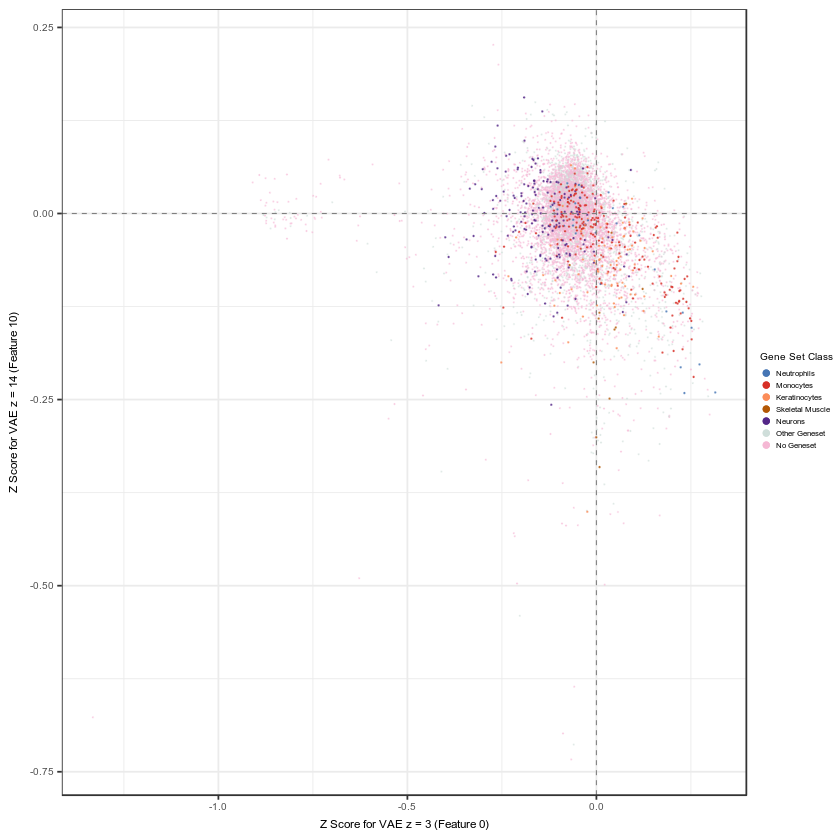

In [17]:
other_points_logic <- gene_weights_df$classification %in% c('Other Geneset', 'No Geneset')

panel_f_gg <- ggplot(gene_weights_df,
                     aes(x = vae_0_3,
                         y = vae_10,
                         color = classification)) +
    geom_point(data = subset(gene_weights_df, other_points_logic),
               size = 0.02,
               alpha = 0.4) +
    geom_point(data = subset(gene_weights_df, !other_points_logic),
               size = 0.07,
               alpha = 0.6) +
    geom_hline(yintercept = 0,
               linetype = 'dashed',
               color = 'grey50',
               lwd = 0.3) +
    geom_vline(xintercept = 0,
               linetype = 'dashed',
               color = 'grey50',
               lwd = 0.3) +
    scale_color_manual(name = "Gene Set Class",
                       values = color_labels,
                       breaks = geneset_classes) +
    xlab("Z Score for VAE z = 3 (Feature 0)") +
    ylab("Z Score for VAE z = 14 (Feature 10)") +
    theme_bw() +
    theme(axis.title = element_text(size = 7),
          axis.text.x = element_text(size = 6),
          axis.text.y = element_text(size = 6),
          legend.text = element_text(size = 4.7),
          legend.title = element_text(size = 6),
          legend.margin = margin(t = 0, r = 0, b = 0, l = 0),
          legend.box.margin = margin(t = -3, r = 0, b = -3, l = -3)) +
    guides(color = guide_legend(keywidth = 0.1,
                                keyheight = 0.1,
                                default.unit = "inch",
                                override.aes = list(size = 1.4,
                                                    alpha = 1)))

panel_f_gg

## Panel G - Applying BioBombe Signatures to External Neutrophil Dataset

Application of VAE feature 0 in z = 3 vs. VAE feature 10 in z = 14 to [GSE103706](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE103706) ([Rincon et al. 2018](https://doi.org/10.1186/s12864-018-4957-6)).

In [18]:
# Load and process data
file <- file.path('results', 'neutrophil_data_biobombe_results.tsv')
full_neutrophil_results_df <-
    readr::read_tsv(file,
                    col_types = readr::cols(.default = readr::col_double(),
                                            full_id = readr::col_character(),
                                            cell_line = readr::col_character(),
                                            treatment = readr::col_character(),
                                            day = readr::col_character()))

full_neutrophil_results_df <-
    reshape2::melt(full_neutrophil_results_df,
                   id.vars = c('full_id', 'cell_line', 'treatment', 'day'),
                   variable.vars = c('vae_10', 'vae_0'),
                   variable.name = 'feature',
                   value.name = 'score')

full_neutrophil_results_df$feature <-
    dplyr::recode_factor(full_neutrophil_results_df$feature,
                         'vae_0' = 'VAE z = 3 (Feature 0)',
                         'vae_10' = 'VAE z = 14 (Feature 10)',
                         .ordered = TRUE)

head(full_neutrophil_results_df, 3)

full_id,cell_line,treatment,day,feature,score
"PLB-985, not differentiated, replicate 1",PLB-985,Not Differentiated,day 0,VAE z = 14 (Feature 10),15.02312
"PLB-985, DMSO, day 6, replicate 1",PLB-985,DMSO,day 6,VAE z = 14 (Feature 10),-30.06277
"PLB-985, DMSO+Nutridoma, day 4",PLB-985,DMSO+Nutridoma,day 4,VAE z = 14 (Feature 10),-28.91497


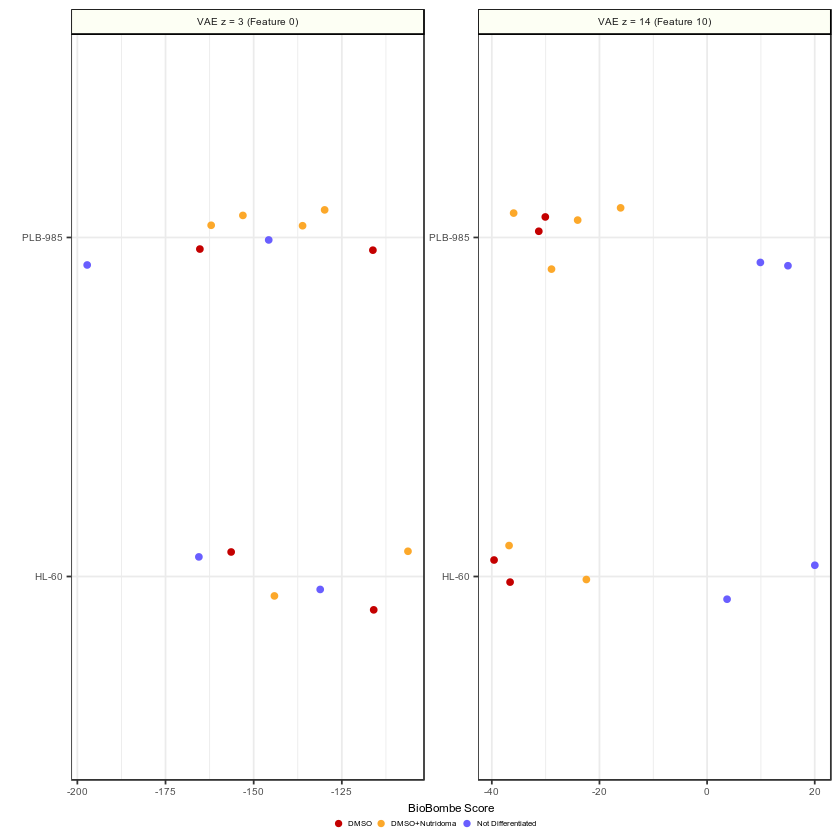

In [19]:
panel_g_gg <- ggplot(full_neutrophil_results_df,
                     aes(x = cell_line, y = score)) +
    geom_jitter(aes(color = treatment), width = 0.1, height = 0) +
    coord_flip() +
    facet_wrap(~feature, scales = "free") +
    scale_color_manual(name = "",
                       values = c("DMSO" = "#c40000",
                                  "DMSO+Nutridoma" = "#fca82a",
                                  "Not Differentiated" = "#695eff")) +
    xlab('') +
    ylab('BioBombe Score') +
    theme_bw() +
    theme(strip.background = element_rect(colour = "black", fill = "#fdfff4"),
          strip.text = element_text(size = 6),
          axis.title = element_text(size = 7),
          axis.text.x = element_text(size = 6),
          axis.text.y = element_text(size = 6),
          legend.position = 'bottom',
          legend.text = element_text(size = 4.7),
          legend.margin = margin(0, 0, 0, 0),
          legend.box.margin = margin(-8, 0, 0, 0)) +
    guides(color = guide_legend(nrow = 1,
                                ncol = 5,
                                byrow = FALSE,
                                keywidth = 0.1,
                                keyheight = 0.1,
                                default.unit = "inch",
                                override.aes = list(size = 1.4,
                                                    alpha = 1)))

panel_g_gg

## Panel H - Applying BioBombe Signatures to External Monocyte Dataset

Application of VAE feature 2 in z = 3 vs. NMF feature 6 in z = 200 to [GSE24759](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE24759) ([Novershtern et al. 2011](https://doi.org/10.1016/j.cell.2011.01.004)).

In [20]:
# Load and process results
file <- file.path('results', 'hematopoietic_data_biobombe_results.tsv')
full_heme_results_df <-
    readr::read_tsv(file,
                    col_types = readr::cols(.default = readr::col_double(),
                                            cell_type = readr::col_character(),
                                            replicate = readr::col_character(),
                                            cell = readr::col_character(),
                                            cell_class = readr::col_character()))

full_heme_results_df <-
    reshape2::melt(full_heme_results_df,
                   id.vars = c('cell_type', 'replicate', 'cell', 'cell_class'),
                   variable.vars = c('vae_2', 'nmf_6'),
                   variable.name = 'feature',
                   value.name = 'score')

full_heme_results_df$feature <-
    dplyr::recode_factor(full_heme_results_df$feature,
                         'vae_2' = 'VAE z = 3 (Feature 2)',
                         'nmf_6' = 'NMF z = 200 (Feature 6)',
                         .ordered = TRUE)

head(full_heme_results_df, 3)

cell_type,replicate,cell,cell_class,feature,score
HSC1,1,HSC1_1,HSC,VAE z = 3 (Feature 2),16.63507
HSC1,13,HSC1_13,HSC,VAE z = 3 (Feature 2),16.51509
HSC1,14,HSC1_14,HSC,VAE z = 3 (Feature 2),16.75196


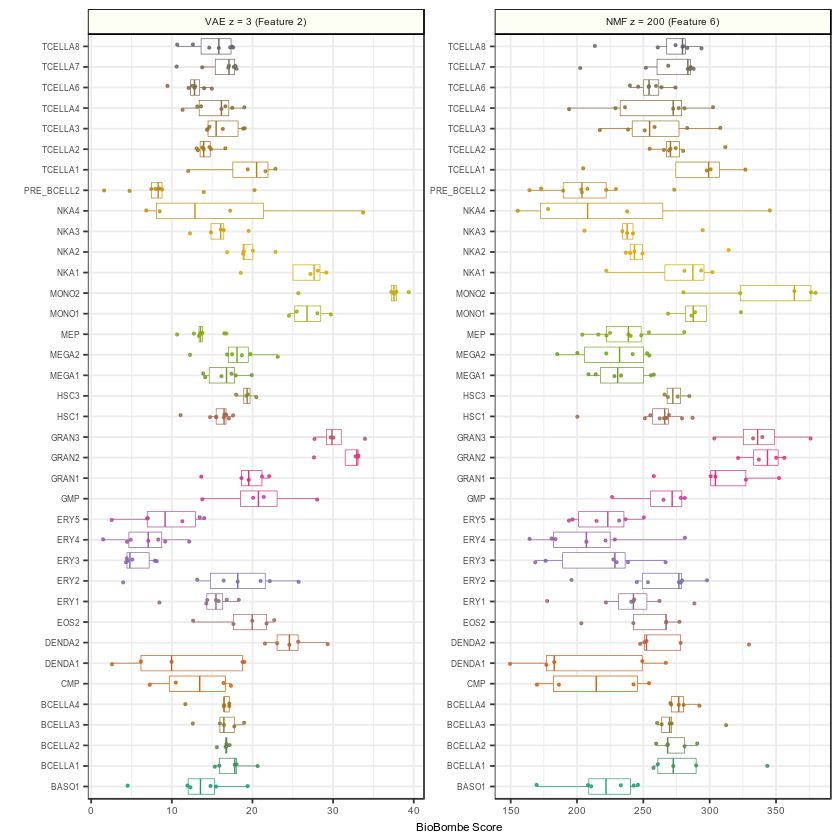

In [21]:
# Plot
n_colors <- length(unique(full_heme_results_df$cell_type))

panel_h_gg <- ggplot(full_heme_results_df,
                     aes(x = cell_type, y = score)) +
    geom_boxplot(aes(color = cell_type), outlier.alpha = 0, lwd = 0.2) +
    geom_jitter(aes(color = cell_type), width = 0.1, size = 0.5, alpha = 0.8) +
    facet_wrap(~ feature, scales = "free", ncol = 2) +
    coord_flip() +
    scale_color_manual(values = colorRampPalette(RColorBrewer::brewer.pal(8, "Dark2"))(n_colors)) +
    xlab('') +
    ylab('BioBombe Score') +
    theme_bw() +
    theme(strip.background = element_rect(colour = "black", fill = "#fdfff4"),
          strip.text = element_text(size = 6),
          axis.title = element_text(size = 7),
          axis.text.x = element_text(size = 6),
          axis.text.y = element_text(size = 5),
          legend.position = 'none')

panel_h_gg

## Full Figure - Combine All Panels and Display with Cowplot

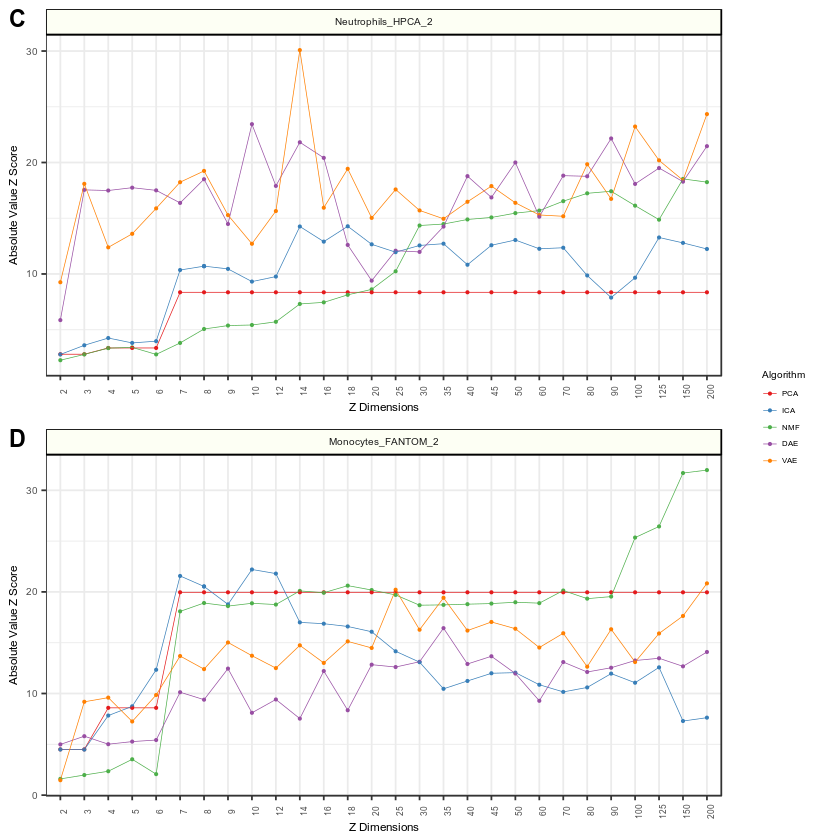

In [22]:
c_and_d_legend_gg <- cowplot::get_legend(panel_c_gg) 
c_and_d_gg <- cowplot::plot_grid(
    panel_c_gg + theme(legend.position = "none"),
    panel_d_gg + theme(legend.position = "none"),
    nrow = 2,
    labels = c("C", "D")
)

c_and_d_gg <- cowplot::plot_grid(
    c_and_d_gg,
    c_and_d_legend_gg,
    rel_widths = c(1, 0.15),
    ncol = 2
)

c_and_d_gg

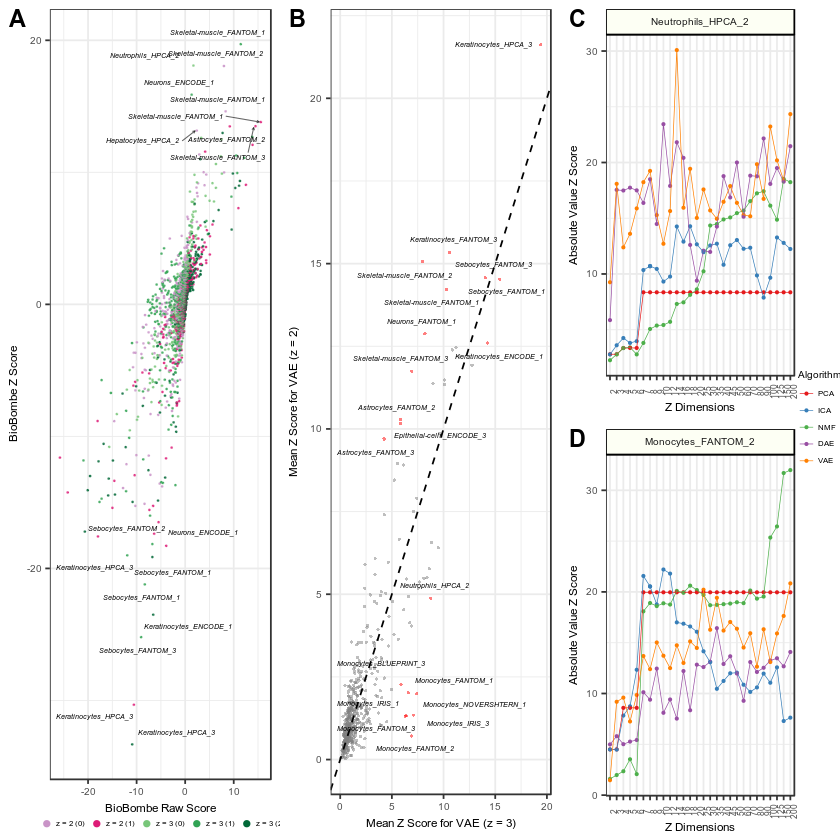

In [23]:
a_b_c_and_d_gg <- cowplot::plot_grid(
    panel_a_gg,
    panel_b_gg,
    c_and_d_gg,
    ncol = 3,
    labels = c("A", "B", "")
)

a_b_c_and_d_gg

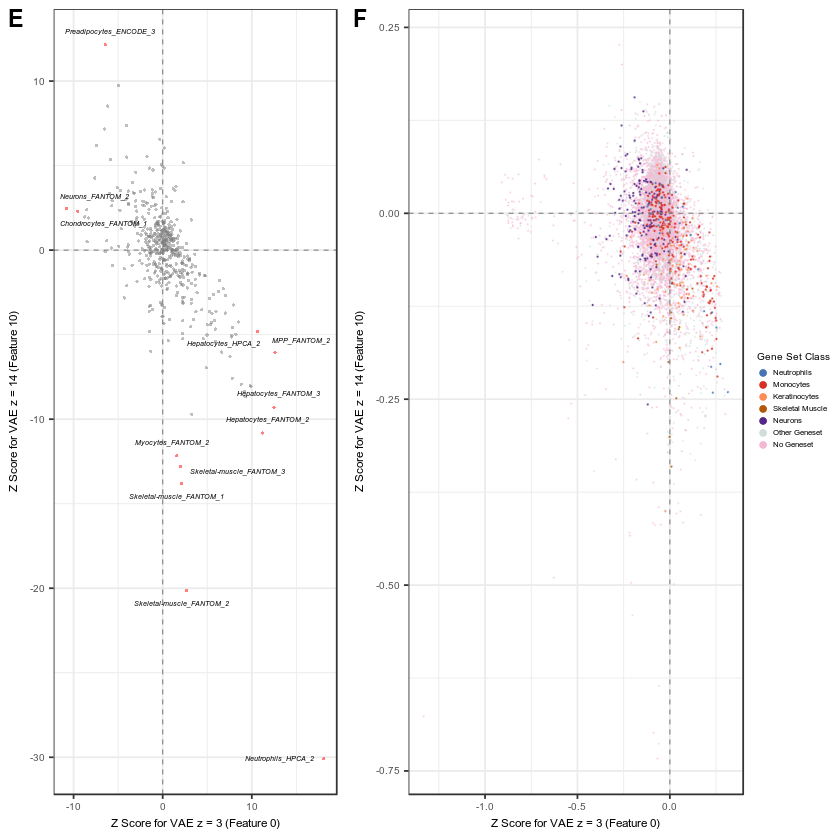

In [24]:
e_and_f_gg <- cowplot::plot_grid(
    panel_e_gg,
    panel_f_gg,
    ncol = 2,
    labels = c("E", "F"),
    rel_widths = c(0.7, 1)
)

e_and_f_gg

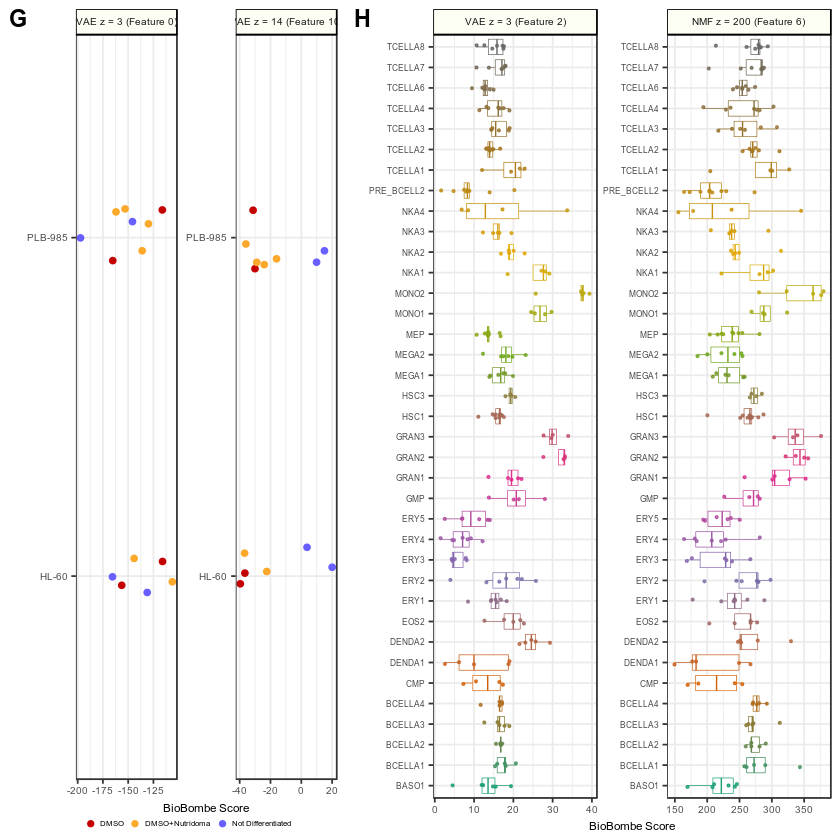

In [25]:
g_and_h_gg <- cowplot::plot_grid(
    panel_g_gg,
    panel_h_gg,
    ncol = 2,
    labels = c("G", "H"),
    rel_widths = c(0.7, 1)
)

g_and_h_gg

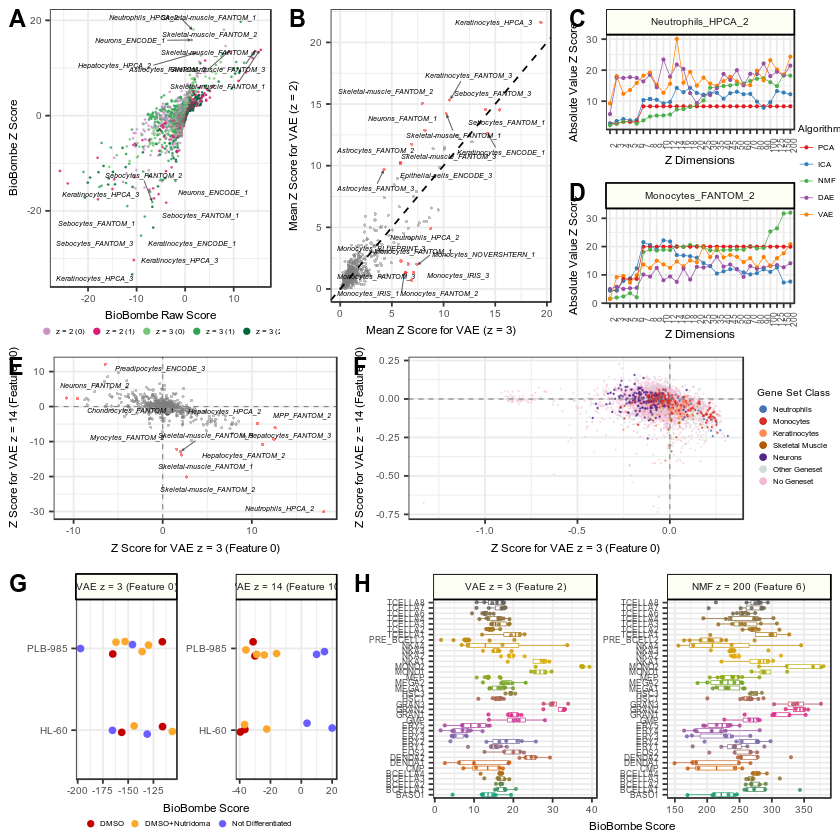

In [26]:
full_gg <- cowplot::plot_grid(
    a_b_c_and_d_gg,
    e_and_f_gg,
    g_and_h_gg,
    nrow = 3,
    rel_heights = c(1.2, 0.75, 0.95)
)

full_gg

In [27]:
for(extension in c('.png', '.pdf')) {
    gg_file <- paste0("gtex_biobombe_main_figure", extension)
    gg_file <- file.path("figures", gg_file)
    cowplot::save_plot(filename = gg_file,
                       plot = full_gg,
                       base_height = 9,
                       base_width = 8)
}